In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
df = pd.read_csv("./kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
for col in ['sqft_lot','bathrooms']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan


In [61]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1081
sqft_living         0
sqft_lot         1081
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [62]:
df[['price', 'sqft_living', 'bedrooms']].describe()


,price,sqft_living,bedrooms
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842
std,3.671272e+05,918.440897,0.930062
min,7.500000e+04,290.000000,0.000000
25%,3.219500e+05,1427.000000,3.000000
50%,4.500000e+05,1910.000000,3.000000
75%,6.450000e+05,2550.000000,4.000000
max,7.700000e+06,13540.000000,33.000000


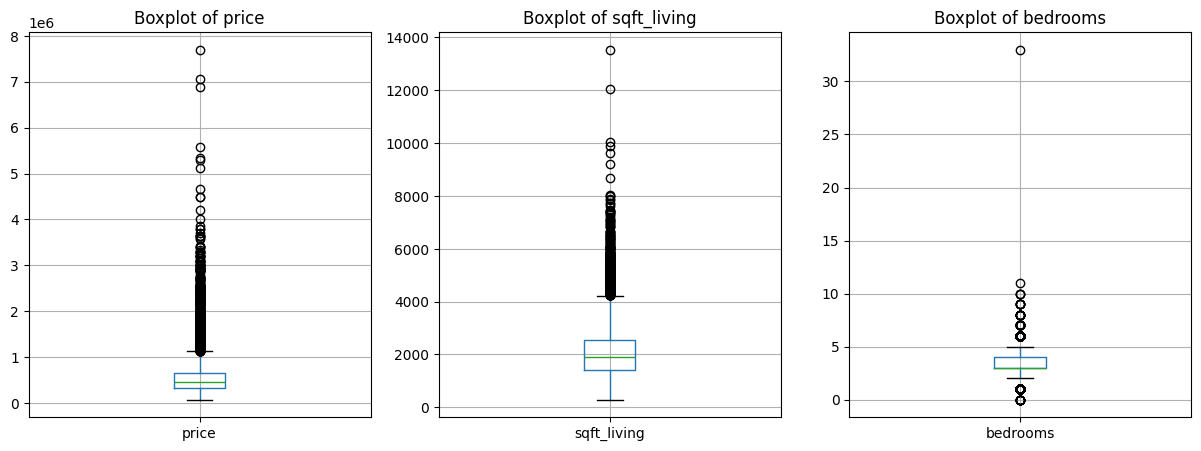

In [63]:


features = ['price', 'sqft_living', 'bedrooms']

plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
plt.show()

In [64]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['price', 'sqft_living', 'bedrooms']:
    df = remove_outliers_iqr(df, col)

print(df.shape)


(19687, 21)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19687 non-null  int64  
 1   date           19687 non-null  object 
 2   price          19687 non-null  float64
 3   bedrooms       19687 non-null  int64  
 4   bathrooms      18713 non-null  float64
 5   sqft_living    19687 non-null  int64  
 6   sqft_lot       18713 non-null  float64
 7   floors         19687 non-null  float64
 8   waterfront     19687 non-null  int64  
 9   view           19687 non-null  int64  
 10  condition      19687 non-null  int64  
 11  grade          19687 non-null  int64  
 12  sqft_above     19687 non-null  int64  
 13  sqft_basement  19687 non-null  int64  
 14  yr_built       19687 non-null  int64  
 15  yr_renovated   19687 non-null  int64  
 16  zipcode        19687 non-null  int64  
 17  lat            19687 non-null  float64
 18  long       

In [66]:
df['date'] = pd.to_datetime(df['date'])

In [67]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month

In [68]:
df['house_age'] = df['sale_year'] - df['yr_built']

In [69]:
df[['date','sale_year','sale_month','house_age']].head()


,date,sale_year,sale_month,house_age
0,2014-10-13,2014,10,59
1,2014-12-09,2014,12,63
2,2015-02-25,2015,2,82
3,2014-12-09,2014,12,49
4,2015-02-18,2015,2,28


In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


In [71]:
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)


In [72]:
import numpy as np

df['age_since_renovation'] = np.where(
    df['yr_renovated'] != 0,
    df['sale_year'] - df['yr_renovated'],
    df['house_age']
)


In [73]:
df[['yr_built','yr_renovated','sale_year','house_age','was_renovated','age_since_renovation']].head(10)


,yr_built,yr_renovated,sale_year,house_age,was_renovated,age_since_renovation
0,1955,0,2014,59,0,59
1,1951,1991,2014,63,1,23
2,1933,0,2015,82,0,82
3,1965,0,2014,49,0,49
4,1987,0,2015,28,0,28
6,1995,0,2014,19,0,19
7,1963,0,2015,52,0,52
8,1960,0,2015,55,0,55
9,2003,0,2015,12,0,12
10,1965,0,2015,50,0,50


In [74]:
df['sqft_living_per_floor'] = df['sqft_living'] / df['floors'].replace(0, np.nan)

df['bath_per_bed'] = df['bathrooms'] / df['bedrooms'].replace(0, np.nan)

In [75]:
df['sqft_living_per_floor'] = np.where(df['floors'] != 0,
                                       df['sqft_living']/df['floors'],
                                       df['sqft_living'])

df['bath_per_bed'] = np.where(df['bedrooms']!= 0,
                              df['bathrooms'] / df['bedrooms'],
                              df['bathrooms'])

In [76]:
%pip install scikit-learn --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## TASK__2


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ['sqft_living', 'sqft_lot', 'house_age',
                'age_since_renovation', 'bath_per_bed',
                'sqft_living_per_floor', 'bedrooms', 'floors']

cat_features = ['zipcode', 'waterfront', 'view']

passthrough_features = ['grade', 'condition', 'renovation_status']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


In [78]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.compose import ColumnTransformer

numerical_features = ['sqft_living', 'sqft_lot', 'house_age',
                      'age_since_renovation','sqft_living_per_floor',
                      'floors','bedrooms','bath_per_bed']

categorical_features = ['zipcode', 'waterfront', 'view']
passthrough_features = ['grade','condition','was_renovated']

preprocessor = ColumnTransformer([
    ("num", num_transformer, numerical_features),
    ("cat", cat_transformer, categorical_features),
    ("pass", SimpleImputer(strategy="most_frequent"), passthrough_features)
])



# TASK-3

In [80]:
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [81]:
linreg_param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5]
}
gb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth':[3,5]
}   

In [82]:
from sklearn.model_selection import GridSearchCV

linreg_search = GridSearchCV(
    linreg_pipeline, linreg_param_grid, cv=3, scoring='r2', n_jobs=-1
)

rf_search = GridSearchCV(
    rf_pipeline, rf_param_grid, cv=3, scoring='r2', n_jobs=-1
)

gb_search = GridSearchCV(
    gb_pipeline, gb_param_grid, cv=3, scoring='r2', n_jobs=-1,error_score='raise'
)


linreg_search.fit(X_train, y_train)
rf_search.fit(X_train,y_train)
gb_search.fit(X_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__learning_rate': [0.05, 0.1], 'regressor__max_depth': [3, 5], 'regressor__n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


TASK-4

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(grid, X_test, y_test):
    y_pred = grid.predict(X_test)
    return {
        'Best Params': grid.best_params_,
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

print("Linear Regression:", evaluate_model(linreg_search, X_test, y_test))
print("Random Forest:", evaluate_model(rf_search, X_test, y_test))
print("Gradient Boosting:", evaluate_model(gb_search, X_test,y_test))

Linear Regression: {'Best Params': {'regressor__fit_intercept': True, 'regressor__positive': False}, 'R2 Score': 0.8329759228530649, 'RMSE': 83565.37849908775, 'MAE': 61504.70285169554}
Random Forest: {'Best Params': {'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}, 'R2 Score': 0.7895970100538057, 'RMSE': 93791.3523204206, 'MAE': 66133.83391190298}
Gradient Boosting: {'Best Params': {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}, 'R2 Score': 0.8280812174052185, 'RMSE': 84780.99471804769, 'MAE': 61779.565095842976}


In [87]:
best_model = linreg_search

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

final_eval = {
    "Best Params": best_model.best_params_,
    "R2 Score": r2_score(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "MAE": mean_absolute_error(y_test, y_pred)
}

print("Final Evaluation (Best Model):")
print(final_eval)

Final Evaluation (Best Model):
{'Best Params': {'regressor__fit_intercept': True, 'regressor__positive': False}, 'R2 Score': 0.8329759228530649, 'RMSE': 83565.37849908775, 'MAE': 61504.70285169554}


               Model                                        Best Params  \
0  Linear Regression  {'regressor__fit_intercept': True, 'regressor_...   
1      Random Forest  {'regressor__max_depth': None, 'regressor__min...   
2  Gradient Boosting  {'regressor__learning_rate': 0.1, 'regressor__...   

   R2 Score          RMSE           MAE  
0  0.832976  83565.378499  61504.702852  
1  0.789597  93791.352320  66133.833912  
2  0.828081  84780.994718  61779.565096  


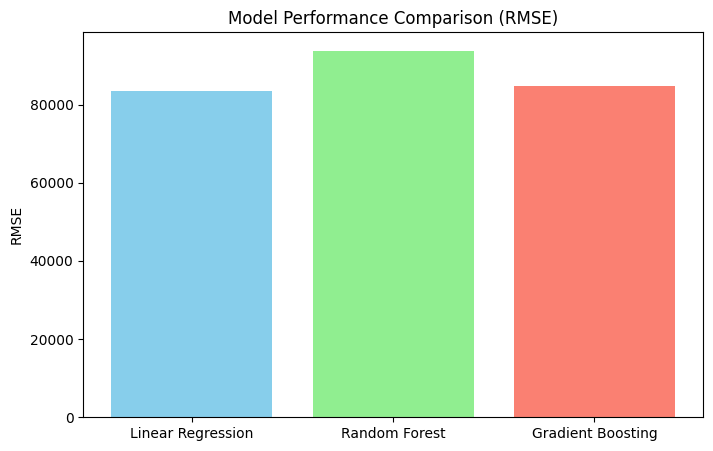

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

linreg_results = evaluate_model(linreg_search, X_test, y_test)
rf_results = evaluate_model(rf_search, X_test, y_test)
gb_results = evaluate_model(gb_search, X_test, y_test)

results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Best Params": linreg_results["Best Params"],
        "R2 Score": linreg_results["R2 Score"],
        "RMSE": linreg_results["RMSE"],
        "MAE": linreg_results["MAE"]
    },
    {
        "Model": "Random Forest",
        "Best Params": rf_results["Best Params"],
        "R2 Score": rf_results["R2 Score"],
        "RMSE": rf_results["RMSE"],
        "MAE": rf_results["MAE"]
    },
    {
        "Model": "Gradient Boosting",
        "Best Params": gb_results["Best Params"],
        "R2 Score": gb_results["R2 Score"],
        "RMSE": gb_results["RMSE"],
        "MAE": gb_results["MAE"]
    }
])

print(results)

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["RMSE"], color=["skyblue", "lightgreen", "salmon"])
plt.ylabel("RMSE")
plt.title("Model Performance Comparison (RMSE)")
plt.show()


The best model for this dataset is Linear Regression.
Unlike tree-based models, Linear Regression does not provide feature importance directly.
Instead, we can interpret the coefficients of the model to understand how each feature influences the target.